In [1]:
import tensorflow as tf  # without installing tensorflow-gpu you can import tensorflow

2026-01-16 06:32:03.565797: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768545123.843058      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768545123.924603      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768545124.568507      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768545124.568570      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768545124.568573      55 computation_placer.cc:177] computation placer alr

In [2]:
print(tf.__version__)

2.19.0


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13] # the records indepentdent features to be feeded to input layer
y = dataset.iloc[:, 13] # classification column or dependent feature
print("Dataset Shape", dataset.shape)
dataset.head()

Dataset Shape (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
#  for drop_first = true means, instead of creating three columns, it will create 2 now
gender=pd.get_dummies(X['Gender'],drop_first=True)

When performing one-hot encoding on categorical variables, you typically convert each category into a binary vector (column). For instance, if you have a categorical feature Geography with three values (France, Spain, Germany), one-hot encoding would normally create three new columns:

Geography_France
Geography_Spain
Geography_Germany
Each of these columns would be binary (0 or 1), representing the presence or absence of that particular category.

However, including all these columns in a regression model can introduce multicollinearity (the condition where two or more predictor variables are highly correlated). This is because the columns are not independent of each other. Specifically, if you know the values of two of the columns, you can determine the value of the third column. For instance, if Geography_France and Geography_Spain are both 0, then Geography_Germany must be 1.

To avoid this issue, you can drop one of the columns. By setting drop_first=True, you omit the first category, which effectively creates a reference category (also known as a baseline category). This helps to prevent the problem of multicollinearity because the remaining columns are now linearly independent.

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)
# the axis parameter determines whether you are concatenating along rows or columns.
#Here's a detailed explanation of what axis=1 means column

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Setting random_state ensures that the split of the data into training and testing sets is reproducible.
#This means that every time you run your code with the same random_state value, you'll get the same split of
#the data. This is important for debugging, comparing results, and ensuring consistent performance evaluation.


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Part 2 - Now let's make the ANN!

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [10]:
# Initialising the ANN
classifier = Sequential()

In [11]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=8,activation='relu', input_dim = 11))
#--------Q.1 What do you mean by units = 11?
#--------Q.2 Do we have activation function in input layer?


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-16 06:32:22.682721: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=4,activation='relu'))
#--------Q.3 What do you mean by units = 6 in above function?
classifier.add(Dense(units=1, activation='sigmoid'))

In [13]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7979 - loss: 0.5523 - val_accuracy: 0.7955 - val_loss: 0.4700
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8007 - loss: 0.4513 - val_accuracy: 0.7955 - val_loss: 0.4434
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8003 - loss: 0.4246 - val_accuracy: 0.7955 - val_loss: 0.4335
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7955 - loss: 0.4219 - val_accuracy: 0.7955 - val_loss: 0.4279
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7947 - loss: 0.4134 - val_accuracy: 0.7955 - val_loss: 0.4211
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7961 - loss: 0.4112 - val_accuracy: 0.7955 - val_loss: 0.4156
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8115 - loss: 0.3943 - val_accuracy: 0.8175 - val_loss: 0.4069
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8244 - loss: 0.3996 - val_accuracy: 0.

In [15]:
# list all data in history

print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


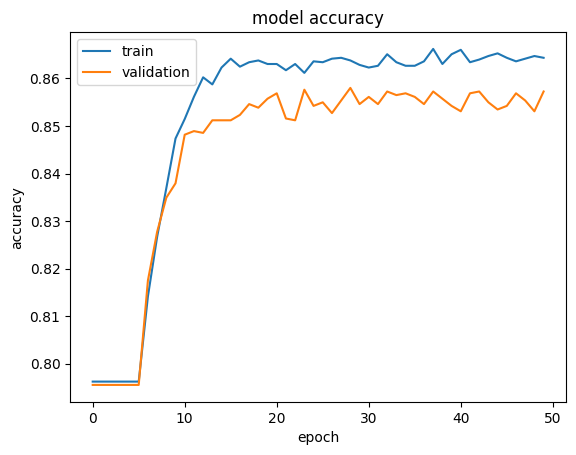

In [16]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

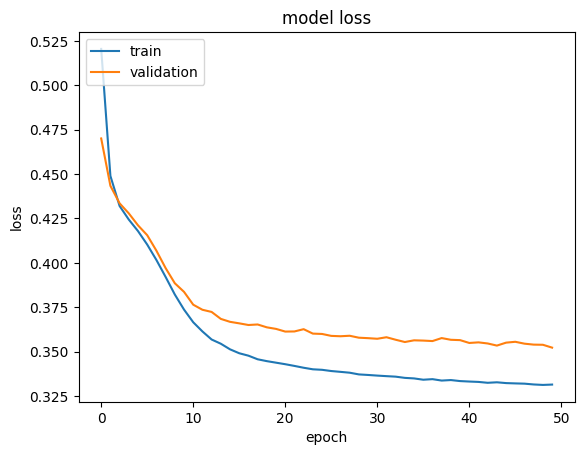

In [17]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1511,   84],
       [ 206,  199]])

In [20]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [21]:
score

0.855